In [1]:
import pandas as pd
import numpy as np
from sargas import *
import matplotlib.pyplot as plt

# NVT Simulation

In [32]:
nparticles = 500

density = 8e-1
volume = nparticles / density
temperature = 8e-1
rc = 3.0

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True)
configuration = Configuration.from_lattice(nparticles, density)
system = System(configuration, potential)
# system = System.insert_particles(nparticles, volume, temperature, 15, rc, potential, nparticles, 1000000)

displace_particle = MCMove.displace_particle(0.1, 0.4, temperature)
mc = MonteCarlo([displace_particle], [1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [33]:
%%time
simulation.run(nparticles * 2000)

CPU times: user 8.36 s, sys: 6.47 ms, total: 8.37 s
Wall time: 8.35 s


In [34]:
simulation.deactivate_propagator_updates()
props = Observer.properties(1000)
simulation.add_observer(props)
widom = Observer.widom_insertion(100)
simulation.add_observer(widom)

In [35]:
%%time
simulation.run(5_000_000)

CPU times: user 51 s, sys: 114 ms, total: 51.1 s
Wall time: 51 s


In [36]:
properties = pd.DataFrame(props.data)
mu = pd.DataFrame(widom.data)

In [37]:
-np.log(np.exp(-mu / temperature).mean() / density) * temperature

mu   -3.319602
dtype: float64

In [37]:
-np.log(np.exp(-mu / temperature).mean()) * temperature

mu   -4.186808
dtype: float64

In [9]:
print("u = {:.5e} +- {:.5e}".format(properties.energy.mean() / system.nparticles, properties.energy.sem() / system.nparticles))

u = -6.17972e+00 +- 6.10213e-04


In [10]:
print("p = {:.5e} +- {:.5e}".format(properties.pressure.mean() + density / temperature, properties.pressure.sem()))

p = 2.75709e+00 +- 3.09070e-03


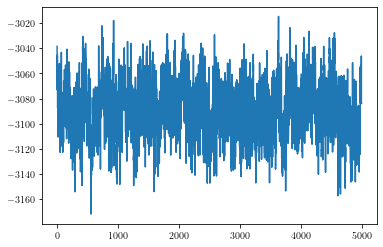

In [11]:
plt.plot(properties.energy)

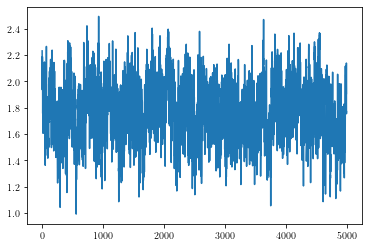

In [12]:
plt.plot(properties.pressure)

# NPT

In [2]:
nparticles = 500

density = 9e-1
volume = nparticles / density
temperature = 9e-1
pressure = 2.6
rc = 3.0

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True)
configuration = Configuration.from_lattice(nparticles, density)
system = System(configuration, potential)

displace_particle = MCMove.displace_particle(0.1, 0.4, temperature)
change_volume = MCMove.change_volume(1.0, 0.5, pressure, temperature)
mc = MonteCarlo([displace_particle, change_volume], [nparticles, 1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [3]:
%%time
simulation.run(1_000_000)

CPU times: user 9.96 s, sys: 11.3 ms, total: 9.97 s
Wall time: 9.95 s


In [4]:
#simulation.deactivate_propagator_updates()
props = Observer.properties(1000)
simulation.add_observer(props)
widom = Observer.widom_insertion(100)
simulation.add_observer(widom)

In [5]:
simulation.run(1_000_000)

In [6]:
properties = pd.DataFrame(props.data)

In [7]:
print("u = {:.5e} +- {:.5e}".format(properties.energy.mean() / system.nparticles, properties.energy.sem() / system.nparticles))

u = -6.16165e+00 +- 1.36564e-03


In [8]:
print("p = {:.5e} +- {:.5e}".format(properties.pressure.mean() + properties.density.mean() / temperature, properties.pressure.sem()))

p = 2.86429e+00 +- 6.98666e-03


In [9]:
print("v = {:.5e} +- {:.5e}".format(properties.volume.mean(), properties.volume.sem()))

v = 5.55556e+02 +- 3.59689e-15


In [10]:
properties.describe()

,nparticles,density,volume,pressure,energy,virial
count,1000.0,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.0,9.000000e-01,5.555556e+02,1.864288,-3080.825270,3944.138593
std,0.0,2.221557e-16,1.137437e-13,0.220937,21.592686,368.229161
min,500.0,9.000000e-01,5.555556e+02,1.105959,-3156.658609,2680.256858
25%,500.0,9.000000e-01,5.555556e+02,1.716439,-3095.848512,3697.723992
50%,500.0,9.000000e-01,5.555556e+02,1.843122,-3082.570009,3908.862415
75%,500.0,9.000000e-01,5.555556e+02,2.004506,-3066.433338,4177.835927
max,500.0,9.000000e-01,5.555556e+02,2.653278,-3005.244343,5259.121831


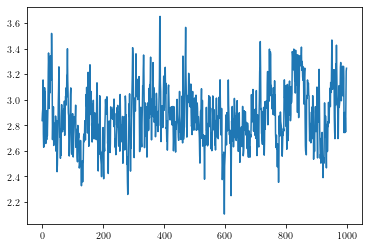

In [11]:
plt.plot(properties.pressure + properties.density / temperature)

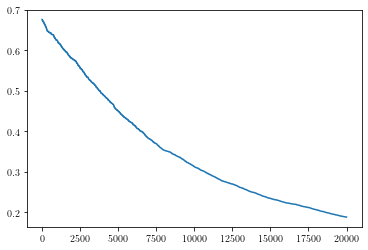

In [64]:
plt.plot(properties.density)

# $\mu$VT Simulation

In [2]:
density = 0.8
nparticles = 500
volume = nparticles / density
temperature = 0.8
rc = 3.0

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True)
configuration = Configuration.from_lattice(nparticles, density, max_nparticles=800)
system = System(configuration, potential)

displace_particle = MCMove.displace_particle(0.1, 0.4, temperature)
insert_delete_particle = MCMove.insert_delete_particle(0, temperature)
mc = MonteCarlo([displace_particle, insert_delete_particle], [3, 1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [3]:
%%time
print("Equilibration")
simulation.run(nparticles * 1000)

simulation.deactivate_propagator_updates()
props = Observer.properties(100)
simulation.add_observer(props)

print("Production")
simulation.run(nparticles * 5000)

Equilibration
Production
CPU times: user 911 ms, sys: 0 ns, total: 911 ms
Wall time: 908 ms


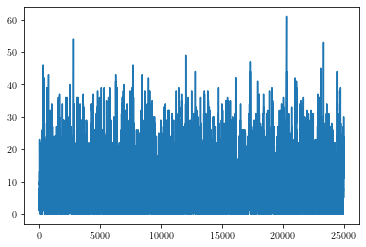

In [4]:
properties = pd.DataFrame(props.data)
plt.plot(properties.nparticles)